# Tarea 2: Laboratorio I

#### Integrantes: Benjamín Ignacio Ayala Baeza, María Ignacia Espinoza Inzunza, Florencia Andrea Fuentes Jara, Martín Andrés Sepúlveda Zúñiga

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as sc

#### Para comenzar, debemos notar que nos piden el mismo procedimiento para diversos casos, de forma que para facilitar el trabajo definiremos a continuacion una serie de funciones para realizar lo solicitado 

### Funcion para los Graficos 

In [40]:
def graph(data, name):
    plt.scatter(range(len(data)), data, s=8)
    plt.xlabel('Numero Medicion')
    plt.ylabel('Aceleracion z')
    plt.title(name)


### Funcion para los Histogramas

In [41]:
def hist(data, name):
    plt.hist(data, bins=20)
    plt.xlabel("Aceleracion z")
    plt.ylabel('Numero de Mediciones')
    plt.title(name)

### Funcion para el Ajuste

In [42]:
def fun(x,a,b,c):
    return a*np.exp(-b*(x-c)**2)

In [73]:
def graf3(data, name):
    plt.hist(data, bins=20, label='Datos')
    histo = np.histogram(data, bins=20)
    
    pt1 = list()
    pt2 = list()
    pt3 = list()
    
    for i in range(0,20,1):
        pt1.append(histo[1][i])
        
    for i in range(0,20,1):
        pt2.append(histo[1][i])
        
    for j in range(0,20,1):
        pt3.append((pt1[j] + pt2[j])*0.5) #donde el punto 3 es el punto medio de cada barra del hist
    
    aux = np.histogram(data, bins=100)
    x = aux[1]
    guess = (600,100,0.2)
    par = sc.curve_fit(fun,pt3, histo[0], p0=guess)[0]
    y = fun(x,par[0],par[1],par[2])
    plt.plot(x,y, label='Ajuste')

### Funcion para los Residuos

In [80]:
def re(data,name):
    histo = np.histogram(data, bins=20)
    
    pt1 = list()
    pt2 = list()
    pt3 = list()
    
    for i in range(0,20,1):
        pt1.append(histo[1][i])
        
    for i in range(0,20,1):
        pt2.append(histo[1][i])
        
    for j in range(0,20,1):
        pt3.append((pt1[j] + pt2[j])*0.5) #donde el punto 3 es el punto medio de cada barra del hist
    
    guess = (600,100,0.2)
    par = sc.curve_fit(fun,pt3, histo[0], p0=guess)[0]
    y = fun(pt3,par[0],par[1],par[2])
    res = histo[0]-y
    chi2 = np.sum((histo[0]-y)**2)
    
    plt.scatter(pt3, res)

# Caso 1: Datos sobre Mesa

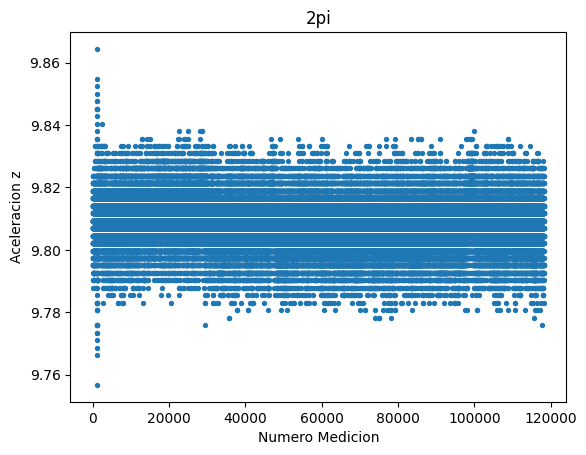

In [91]:
datos_mesa = np.genfromtxt("datos_mesa.csv",skip_header=1000 ,skip_footer=1000, usecols=(3)) 
graph(datos_mesa,'2pi')

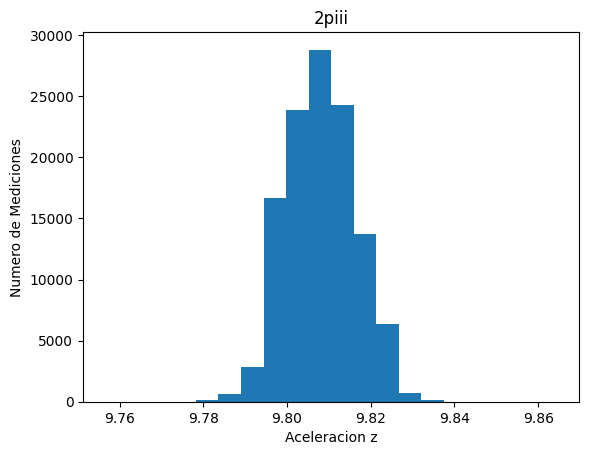

In [94]:
hist(datos_mesa,"2piii")

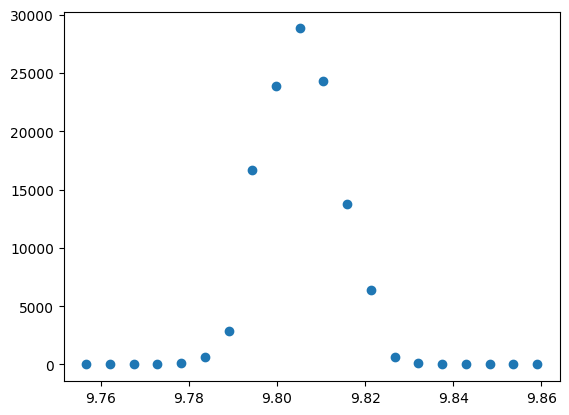

In [96]:
re(datos_mesa, 'aaa')

# Caso 2: Datos sobre Mano

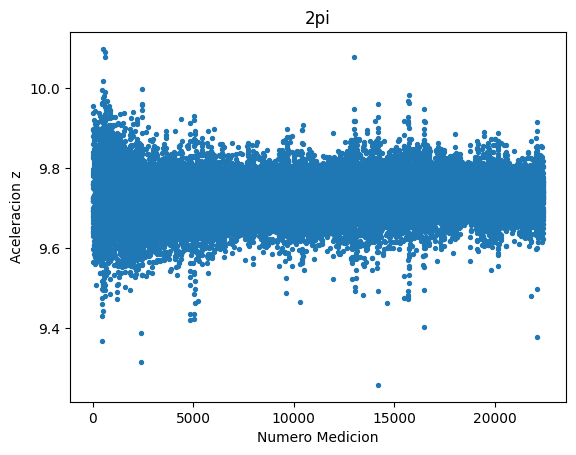

In [92]:
datos_mano = np.genfromtxt("datos_mano.csv",skip_header=1000 ,skip_footer=1000, usecols=(3)) 
graph(datos_mano,'2pi')

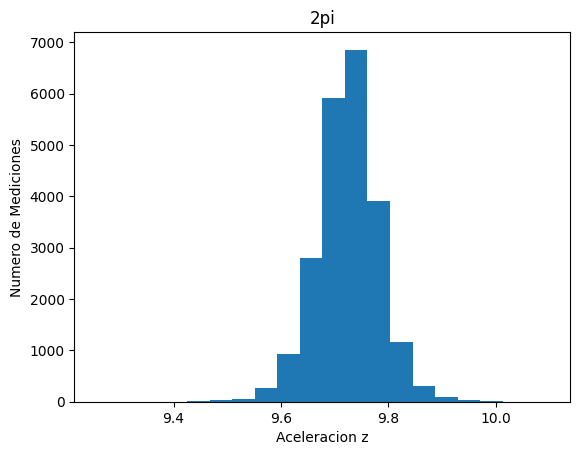

In [93]:
hist(datos_mano,'2pi')

/home/benjaminab/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


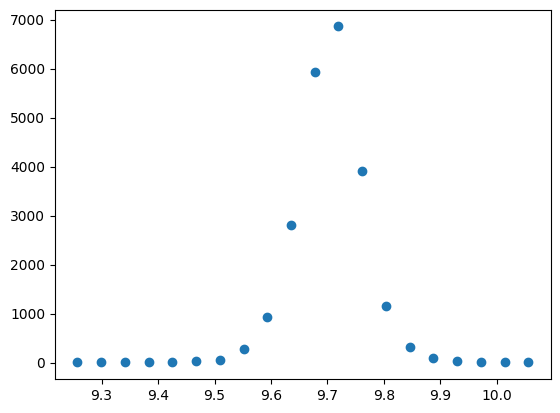

In [95]:
#residuo
re(datos_mano,'residuo')

# Caso 3: Datos bajo Frecuencia

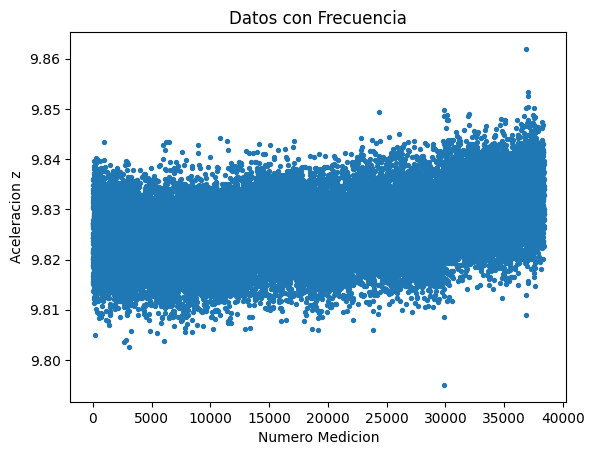

In [90]:
datos_fre = np.genfromtxt("datos_frecuencia.csv",skip_header=1000 ,skip_footer=1000, usecols=(3)) 
#Asi hemos obtenido los datos eliminando los primeros 10000 y utilizando la funcion graph, haremos:
graph(datos_fre ,'Datos con Frecuencia')

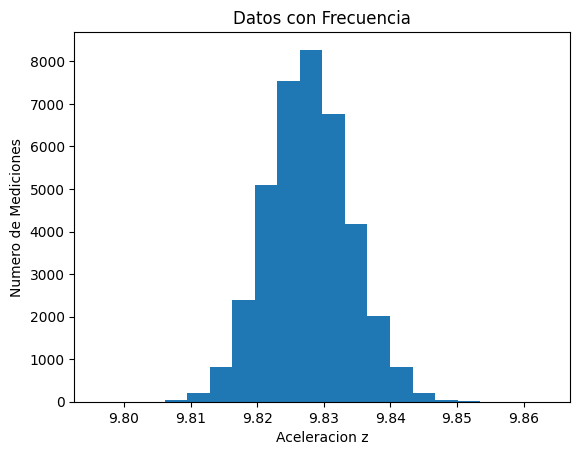

In [62]:
#para obtener el histograma, ocuparemos la funcion hist definida previamente obteniendo:
hist(datos_fre, 'Datos con Frecuencia')

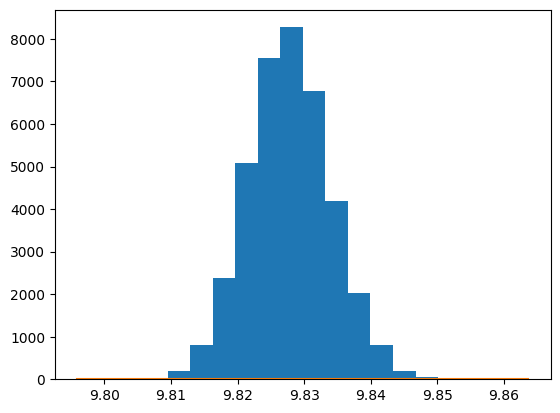

In [82]:
#histograma con ajuste
graf3(datos_fre, 'Datos con Frecuencia')

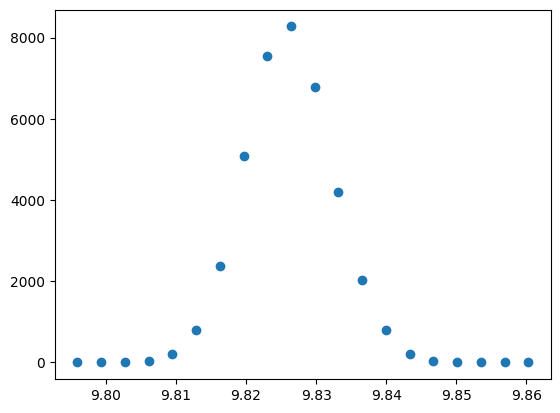

In [83]:
#residuo
re(datos_fre, 'aaa')